In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [3]:
data_dir = '../kaggle_data/'

In [4]:
kaggle_train = data_dir+'train.csv'

In [5]:
df = pd.read_csv(kaggle_train)
#df_train,df_cv = train_test_split(pd.read_csv(kaggle_train))

In [6]:
#df_train.sortlevel()

In [111]:
person_id = df['ID']
y_df = df['target']
y_df.index = df['ID']
category_features = ['v24','v30','v31','v47','v52','v56','v66',\
                     'v74','v75','v79','v91','v107','v110','v112','v113','v125']
complicated_category_features = ['v3','v22','v52','v71']
integer_features = ['v38','v62','v72','v129']

non_numeric = ['ID','target']+category_features+complicated_category_features
numeric_features = []
for c in df.columns:
    if c not in non_numeric:
        numeric_features.append(c)


In [127]:
# df[integer_features]

In [113]:
df_cat = df[category_features]
df_cat.index = df['ID']

In [114]:
df_cat = pd.get_dummies(df_cat,dummy_na=True)

In [115]:
# for c in df_cat.columns.values:
#     print(c)
#     print(df_cat[c].value_counts())

In [116]:
df_num = df[numeric_features]


In [117]:
for c in df_num.columns.values:
    df_num[c] = df_num[c].fillna(df_num[c].mean())
df_num.index = df['ID']

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [118]:
X_df = df_num.merge(df_cat,how='inner',left_index=True,right_index=True)


In [119]:
X_df['Target'] = y_df.values

In [120]:
df_train,df_test = train_test_split(X_df)

In [121]:
y_df_train = df_train['Target']
X_df_train = df_train.drop(['Target'],axis=1)
y_df_test = df_test['Target']
X_df_test = df_test.drop(['Target'],axis=1)


In [157]:
X_train = X_df_train.values
y_train = y_df_train.values
X_test = X_df_test.values
y_test = y_df_test.values

# X_train = X_df_train[imp_features].values
# y_train = y_df_train.values
# X_test = X_df_test[imp_features].values
# y_test = y_df_test.values

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [159]:
clf = LogisticRegression()
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [160]:
np.shape(X_train)

(85740, 155)

TRAINING SET:


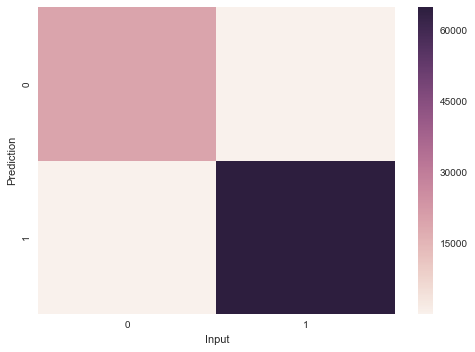

TEST SET:


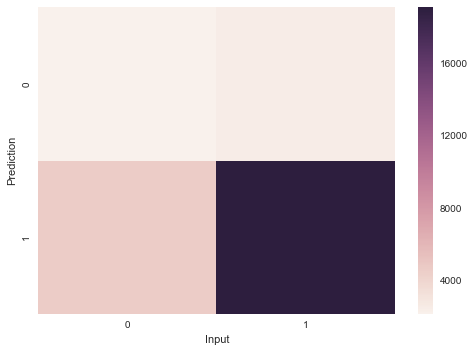

In [161]:
# Predictions on training
print("TRAINING SET:")
import seaborn as sns
from sklearn.metrics import confusion_matrix
ax = sns.heatmap(confusion_matrix(clf.predict(X_train),y_train))
ax.set_xlabel('Input')
ax.set_ylabel('Prediction')
plt.show()

# Predictions on test
print("TEST SET:")
import seaborn as sns
from sklearn.metrics import confusion_matrix
ax = sns.heatmap(confusion_matrix(clf.predict(X_test),y_test))
ax.set_xlabel('Input')
ax.set_ylabel('Prediction')
plt.show()

Feature ranking:
1. feature v49 (0.079302)
2. feature v12 (0.039831)
3. feature v111 (0.037153)
4. feature v39 (0.035726)
5. feature v21 (0.035685)
6. feature v14 (0.034470)
7. feature v34 (0.034063)
8. feature v10 (0.034014)
9. feature v52_G (0.009324)
10. feature v61 (0.008221)
11. feature v47_D (0.007749)
12. feature v24_E (0.007566)
13. feature v47_C (0.007341)
14. feature v52_nan (0.006726)
15. feature v70 (0.006662)
16. feature v47_B (0.006276)
17. feature v81 (0.005878)
18. feature v97 (0.005711)
19. feature v116 (0.005579)
20. feature v68 (0.005567)
21. feature v1 (0.005467)
22. feature v44 (0.005369)
23. feature v119 (0.005348)
24. feature v122 (0.005324)
25. feature v124 (0.005312)
26. feature v28 (0.005306)
27. feature v98 (0.005215)
28. feature v6 (0.005203)
29. feature v37 (0.005188)
30. feature v55 (0.005116)
31. feature v5 (0.005109)
32. feature v118 (0.005099)
33. feature v127 (0.005098)
34. feature v123 (0.005096)
35. feature v69 (0.005049)
36. feature v77 (0.005044)
3

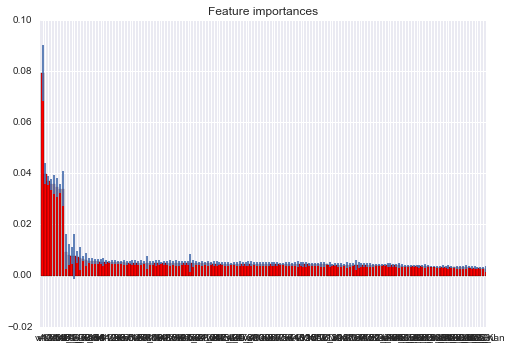

In [162]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
cols = X_df_train.columns.values
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, cols[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")

lim = -1
plt.bar(range(X_train.shape[1])[:lim], importances[indices][:lim],
       color="r", yerr=std[indices][:lim], align="center")
plt.xticks(range(X_train.shape[1])[:lim], np.array(cols)[indices[:lim]])
plt.xlim([-1, max(np.arange(X_train.shape[1])[:lim])])
plt.show()

array(['v10', 'v12', 'v14', 'v21', 'v34', 'v40', 'v50', 'v114'], dtype=object)

In [156]:
# imp_features = cols[importances>0.002]